#### Importing the required Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Importing and Loading the dataset from the location folder

In [2]:
credit = pd.read_csv('/content/drive/MyDrive/Credit Card Fraud Detection/creditcard.csv')
# Displaying 10 random data in the dataset
credit.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42121,40964.0,-0.085259,-0.665412,1.995751,-1.879671,-1.043264,-0.548304,-0.338860,-0.187956,-2.157157,...,-0.272305,-0.350555,0.184689,0.341387,-0.446233,-0.473179,-0.093282,-0.185030,36.00,0
155558,105742.0,-0.439812,0.744043,1.942191,-0.353758,0.596110,0.331573,0.499141,-0.162004,1.645949,...,-0.372143,-0.638514,-0.401403,-1.179182,0.379070,-0.658654,-0.083801,-0.157184,11.27,0
71530,54329.0,-0.994961,2.882408,-2.901456,1.393284,0.245839,-1.378141,0.031048,0.899265,-0.024731,...,-0.150964,0.003390,0.263568,-0.150949,-0.376775,-0.431835,-0.017030,-0.388516,0.89,0
179040,123897.0,2.276570,-1.660225,-0.588459,-1.555288,-1.552123,-0.109263,-1.669989,0.052051,-0.563497,...,0.013178,0.541522,0.168636,0.454411,-0.190598,-0.002562,0.032224,-0.039392,21.00,0
218346,141276.0,2.108212,-0.341746,-1.621436,-0.135109,0.425372,0.052024,-0.121765,-0.051605,0.997459,...,0.037883,0.418323,-0.142229,-1.326308,0.350724,0.260524,-0.031688,-0.087296,1.00,0
120477,75843.0,0.983883,-0.187132,0.448785,1.032701,-0.262859,0.237920,-0.155054,0.055151,-0.072095,...,0.196240,0.349370,-0.296772,-0.468924,0.564506,-0.282312,0.021989,0.036631,125.90,0
221256,142497.0,2.042037,-0.097523,-1.174340,0.223814,0.084395,-0.702304,0.085983,-0.176709,0.279027,...,-0.256706,-0.632104,0.286310,-0.331519,-0.280316,0.197746,-0.073902,-0.073006,1.79,0
258572,158713.0,1.925021,-0.463457,-0.168981,0.439697,-0.826026,-0.353254,-0.706920,0.083036,1.222125,...,0.250467,0.938393,0.119765,0.099435,-0.143859,-0.238045,0.037253,-0.045736,9.99,1
81560,58991.0,1.301194,-0.068359,0.313700,0.331100,-0.238239,0.059031,-0.410471,0.068018,0.598686,...,-0.181320,-0.575673,-0.080036,-1.019262,0.315749,0.301585,-0.015705,0.012541,17.00,0
185478,126685.0,2.149453,-0.779809,-1.636637,-1.001906,-0.069360,0.299640,-1.060476,0.155425,-0.142230,...,0.229546,0.671300,-0.002847,-0.455883,-0.041639,-0.073490,0.020231,-0.023615,29.00,0


#### Displaying the total number of rows and columns in the dataset

In [3]:
print(f"Number of rows in the dataset : {credit.shape[0]}")
print(f"Number of columns in the dataset : {credit.shape[1]}")

Number of rows in the dataset : 284807
Number of columns in the dataset : 31


#### Displaying the complete information about the dataset

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Displaying the complete statistical description of the dataset

In [5]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.123828
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.329385
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Finding out the number of null values present inside the dataset

In [6]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Finding out the duplicate values present inside the dataset

In [7]:
credit.duplicated().sum()

1081

#### Removing all the duplicates from the dataset

In [8]:
credit.drop_duplicates(keep='first',inplace=True)
credit.duplicated().sum()

0

#### Calculating the genuine as well as fraud transactions and the percentage of fraud transactions

In [9]:
genuine_transactions = credit[credit.Class==0].shape[0]
fraud_transactions = credit[credit.Class==1].shape[0]
total = len(credit)
fraud_percentage = (fraud_transactions / total)*100
print(f"Number of Genuine Transactions : {genuine_transactions}")
print(f"Number of Fraud Transactions : {fraud_transactions}")
print(f"Fraud Percentage : {fraud_percentage}")

Number of Genuine Transactions : 248640
Number of Fraud Transactions : 35086
Fraud Percentage : 12.366156080161847


#### Plotting the genuine and fraudulent transactions

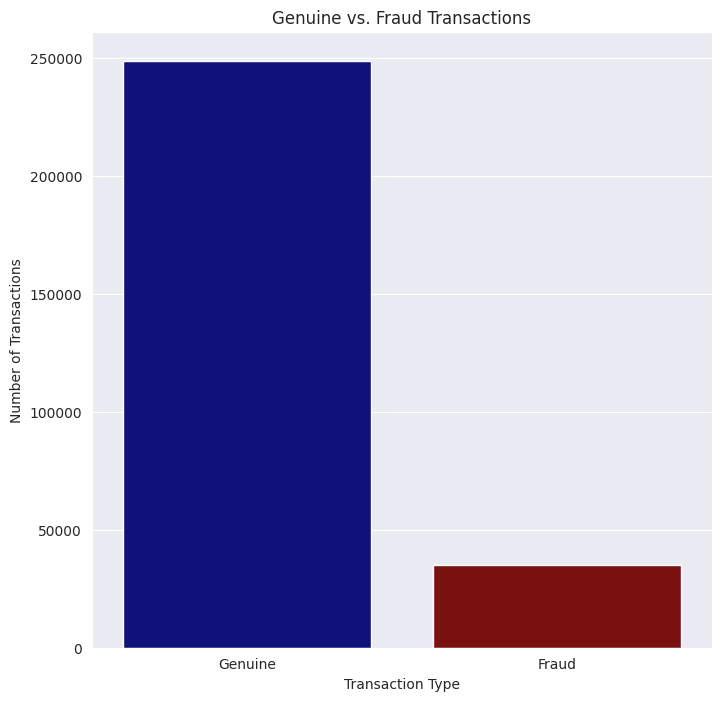

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 8))
sns.barplot(x=['Genuine', 'Fraud'], y=[genuine_transactions, fraud_transactions], palette=['darkblue', 'darkred'])
plt.title('Genuine vs. Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

#### Normalizing the amount column and store the new values in the NormalizedAmount column

In [11]:
ss = StandardScaler()

credit["Amount"] = ss.fit_transform(credit["Amount"].values.reshape(-1,1))

credit.drop(["Time"],inplace=True,axis=1)

credit.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
72680,1.137428,0.072687,0.931640,1.994444,-0.627394,-0.047240,-0.336426,0.162181,0.126358,0.384277,...,-0.105528,-0.145542,0.072389,0.438426,0.229735,0.996325,-0.051011,0.003601,-0.353327,0
245371,0.114089,0.441448,-0.852302,-3.273477,1.175764,-2.194530,2.047550,-0.843655,0.677650,-1.533525,...,0.254906,1.004862,-0.161461,0.017069,-0.568082,-0.513022,0.023698,0.016912,-0.254085,0
54650,-1.434267,1.579558,0.686134,-0.387038,0.373834,-0.077767,0.619566,0.103393,-0.494263,0.484283,...,-0.277002,-0.925857,0.270353,-0.347152,-0.828975,-0.293476,-0.727244,-0.086861,-0.333718,0
259475,2.066429,-0.038324,-1.086585,0.400271,-0.096848,-1.174090,0.196793,-0.342141,0.516379,0.067611,...,-0.290973,-0.694647,0.330118,-0.018939,-0.283680,0.199083,-0.069582,-0.060113,-0.345419,1
246057,-2.343543,2.575675,-2.071502,-0.728540,-0.427468,-0.839597,-0.364519,1.360075,0.148472,0.662924,...,0.410460,1.286757,0.102779,-0.535419,-0.502444,-0.226113,0.006473,0.075628,-0.349773,0
195049,2.246158,-1.478141,-0.506063,-1.571591,-1.477605,-0.386782,-1.402407,-0.055827,-0.960396,1.508509,...,-0.405113,-0.766866,0.484140,0.658427,-0.594871,-0.518166,0.029329,-0.025641,-0.233917,0
44865,1.355144,-0.570349,-0.453026,-0.831294,-0.239699,0.115079,-0.701890,0.083354,-0.510820,0.132205,...,0.001287,-0.176162,-0.175389,-1.436149,0.431716,-0.167838,0.029418,0.034343,-0.124093,0
198821,2.089047,-0.930534,-0.522275,-0.472756,-0.916011,-0.290215,-0.841308,-0.114922,-0.032426,0.765918,...,-0.592970,-1.163704,0.377805,-0.680654,-0.644064,0.309530,-0.011413,-0.036850,-0.173654,0
170390,-1.345141,-0.937878,0.843690,-1.668299,0.841069,-1.797655,-0.588039,0.084992,-0.569300,-0.643093,...,0.367564,0.733535,-0.008647,-0.078982,0.098435,-0.166933,0.323714,0.256208,-0.193622,0
188194,0.213226,0.822786,0.038460,-0.871612,1.144241,-0.482161,1.245149,-0.410448,0.038856,-0.222013,...,-0.370906,-0.663022,-0.111846,-0.985660,-0.347197,0.171345,0.088581,-0.134302,-0.345419,0


#### Splitting the data into X-part and Y-part

In [12]:
x = credit.iloc[:,:-1]
y = credit.iloc[:,-1]

#### Splitting the X-part and Y-part into training as well as testing set

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#### Training the Logistic Regression, Decision Tree and Random Forest Models

In [14]:
lor = LogisticRegression()
dtc = DecisionTreeClassifier(max_depth=2,random_state=42)
rfc = RandomForestClassifier(max_depth=2,n_estimators=100,random_state=42)

In [15]:
lor.fit(x_train,y_train)

LogisticRegression()

In [16]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=42)

#### Predicting the values from the given three models

In [18]:
lor_pred = lor.predict(x_test)
dtc_pred = dtc.predict(x_test)
rfc_pred = rfc.predict(x_test)

#### Comparing the predicted values with the actual values

In [19]:
comp = pd.DataFrame()
comp['Actual Values'] = y_test
comp['LOR Predicted Values'] = lor_pred
comp['DTC Predicted Values'] = dtc_pred
comp['RFC Predicted Values'] = rfc_pred

comp.sample(20)

,Actual Values,LOR Predicted Values,DTC Predicted Values,RFC Predicted Values
148306,0,0,0,0
280061,1,0,0,0
132447,0,0,0,0
72152,0,0,0,0
190958,0,0,0,0
136799,0,0,0,0
275130,1,0,0,0
63972,0,0,0,0
207347,0,0,0,0
9288,0,0,0,0


#### Comparing the confusion matrix of three models

In [20]:
print(f"Confusion Matrix of Logistic Regression : ")
confusion_matrix(y_test,lor_pred)

Confusion Matrix of Logistic Regression : 


array([[74170,   455],
       [10262,   231]])

In [21]:
print(f"Confusion Matrix of Decision Tree Classifier : ")
confusion_matrix(y_test,dtc_pred)

Confusion Matrix of Decision Tree Classifier : 


array([[74625,     0],
       [10493,     0]])

In [22]:
print(f"Confusion Matrix of Random Forest Classifier : ")
confusion_matrix(y_test,rfc_pred)

Confusion Matrix of Random Forest Classifier : 


array([[74625,     0],
       [10493,     0]])

#### Comparing the accuracy score of the three models

In [23]:
print(f"Accuracy Score of Logistic Regression : {accuracy_score(y_test,lor_pred)}")
print(f"Accuracy Score of Decision Tree Classifier : {accuracy_score(y_test,dtc_pred)}")
print(f"Accuracy Score of Random Forest Classifier : {accuracy_score(y_test,rfc_pred)}")

Accuracy Score of Logistic Regression : 0.8740924363824338
Accuracy Score of Decision Tree Classifier : 0.8767240771634672
Accuracy Score of Random Forest Classifier : 0.8767240771634672


#### Comparing the classification report of three models

In [24]:
print("Classification Report of Logistic Regression : \n")
print(classification_report(y_test,lor_pred))

Classification Report of Logistic Regression : 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     74625
           1       0.34      0.02      0.04     10493

    accuracy                           0.87     85118
   macro avg       0.61      0.51      0.49     85118
weighted avg       0.81      0.87      0.82     85118



In [25]:
print("Classification Report of Decision Tree : \n")
print(classification_report(y_test,dtc_pred))

Classification Report of Decision Tree : 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     74625
           1       0.00      0.00      0.00     10493

    accuracy                           0.88     85118
   macro avg       0.44      0.50      0.47     85118
weighted avg       0.77      0.88      0.82     85118



In [26]:
print("Classification Report of Random Forest : \n")
print(classification_report(y_test,rfc_pred))

Classification Report of Random Forest : 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     74625
           1       0.00      0.00      0.00     10493

    accuracy                           0.88     85118
   macro avg       0.44      0.50      0.47     85118
weighted avg       0.77      0.88      0.82     85118

